# _COMO O ACESSO A ESCOLARIDADE INFLUENCIA O INDIVÍDUO A MANTER-SE CONECTADO?_

__Bibliotecas importadas:__

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from math import *
from scipy import stats

__Checando o diretório:__

In [ ]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

__Lendo o arquivo PES:__

In [ ]:
dados = pd.read_csv('../../Excels/PNAD2011/PES2011.csv')

In [ ]:
dados2 = pd.read_csv('../../Excels/PNAD2015/PES2015.csv')

Selecionando colunas:

In [ ]:
dados = dados.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados.tail()

In [ ]:
dados2 = dados2.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados2.tail()

__Removendo outliers da coluna Renda__

In [ ]:
dados.V9532.loc[(dados.V9532 >= 50000)] = 0
dados.V9532.describe()

In [ ]:
dados2.V9532.loc[(dados2.V9532 >= 50000)] = 0
dados2.V9532.describe()

#  __Para escolaridade:__

__Escolaridade é a variável categórica ordinal com maior número de categorias. 
Várias células serão utilizadas em sequência.__

In [ ]:
dados.V4801.loc[(dados.V4801 == 1) | (dados.V4801 == 2)] = 1#'Em alfabetização'

In [ ]:
dados.V4801.loc[(dados.V4801 == 3) | (dados.V4801 == 21)] = 2#'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

In [ ]:
dados.V4801.loc[(dados.V4801 == 23)] = 3#'Jovens e Adultos cursando Ensino Médio'

In [ ]:
dados.V4801.loc[(dados.V4801 == 4) | (dados.V4801 == 5) | (dados.V4801 == 6) | (dados.V4801 == 7) | (dados.V4801 == 12) | (dados.V4801 == 13) | (dados.V4801 == 14) | (dados.V4801 == 15)] = 4#'Ensino Fundamental I em tempo regular'

In [ ]:
dados.V4801.loc[(dados.V4801 == 8) | (dados.V4801 == 9) | (dados.V4801 == 10) | (dados.V4801 == 11) | (dados.V4801 == 16) | (dados.V4801 == 17) | (dados.V4801 == 18) | (dados.V4801 == 19) | (dados.V4801 == 20)] = 5#'Ensino Fundamental I em tempo regular'

In [ ]:
dados.V4801.loc[(dados.V4801 == 22)] = 6#'Ensino Médio em tempo regular'

In [ ]:
dados.V4801.loc[(dados.V4801 == 24)] = 7#'Pré-Vestibulando'

In [ ]:
dados.V4801.loc[(dados.V4801 == 25)] = 8#'Ensino Superior, Mestrando ou Doutorando'

## Agora para 2015:

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 1) | (dados2.V4801 == 2)] = 'Em alfabetização'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 3) | (dados2.V4801 == 21)] = 'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 23)] = 'Jovens e Adultos cursando Ensino Médio'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 4) | (dados2.V4801 == 5) | (dados2.V4801 == 6) | (dados2.V4801 == 7) | (dados2.V4801 == 12) | (dados2.V4801 == 13) | (dados2.V4801 == 14) | (dados2.V4801 == 15)] = 'Ensino Fundamental I em tempo regular'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 8) | (dados2.V4801 == 9) | (dados2.V4801 == 10) | (dados2.V4801 == 11) | (dados2.V4801 == 16) | (dados2.V4801 == 17) | (dados2.V4801 == 18) | (dados2.V4801 == 19) | (dados2.V4801 == 20)] = 'Ensino Fundamental I em tempo regular'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 22)] = 'Ensino Médio em tempo regular'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 24)] = 'Pré-Vestibulando'

In [ ]:
dados2.V4801.loc[(dados2.V4801 == 25)] = 'Ensino Superior, Mestrando ou Doutorando'

__Tratando NaN usando o método__ `.fillna()`

In [ ]:
dados.V4801 = dados.V4801.fillna(value = 0)#'Não Informado')
dados2.V4801 = dados2.V4801.fillna(value = 'Não Informado')

__Checando resultados:__

In [ ]:
dados.head()

In [ ]:
dados2.head()

In [ ]:
a = dados.V4801.value_counts(normalize = 1)
a.plot(kind='bar', color=('blue', 'red'), legend=False)

In [ ]:
b = dados2.V4801.value_counts(normalize = 1)
b.plot(kind='bar', color=('blue', 'red'), legend=False)

# __Para Internet__:

__Atribuindo valores categóricos:__

In [ ]:
dados.V06111.loc[(dados.V06111 == 1)] = 'Sim'
dados.V06111.loc[(dados.V06111 == 3)] = 'Não'

## Agora para 2015

In [ ]:
dados2.V06111.loc[(dados2.V06111 == 1)] = 'Sim'
dados2.V06111.loc[(dados2.V06111 == 3)] = 'Não'

__Tratando NaN usando o método__ `.fillna()`

In [ ]:
dados.V06111 = dados.V06111.fillna(value = 'Não Informado')

In [ ]:
dados2.V06111 = dados2.V06111.fillna(value = 'Não Informado')

__Checando resultados:__

In [ ]:
dados.head()

In [ ]:
dados2.head()

In [ ]:
c = dados.V06111.value_counts(normalize = 1)
c.plot(kind='pie', autopct="%0.2f")
plt.title('Acesso a Internet nos últimos 3 meses em 2011')

In [ ]:
d = dados2.V06111.value_counts(normalize = 1)
d.plot(kind='bar')
#plt.xlim([0,1])
plt.grid()
plt.title('Acesso a Internet nos últimos 3 meses em 2015')
#, autopct="%0.2f"

# __Para celular pessoal:__

__Atribuindo valores categóricos:__

In [ ]:
dados.V06112.loc[(dados.V06112 == 1)] = 'Sim'
dados.V06112.loc[(dados.V06112 == 3)] = 'Não'

In [ ]:
dados2.V06112.loc[(dados2.V06112 == 1)] = 'Sim'
dados2.V06112.loc[(dados2.V06112 == 3)] = 'Não'

__Tratando NaN usando o método__ `.fillna()`

In [ ]:
dados.V06112 = dados.V06112.fillna(value = 'Não Informado')

In [ ]:
dados2.V06112 = dados2.V06112.fillna(value = 'Não Informado')

__Checando a base de dados para Celular em 2011:__

In [ ]:
e = dados.V06112.value_counts(normalize = 1)
e.plot(kind='pie',  legend=False, autopct="%0.2f")

__Agora para 2015:__

In [ ]:
f = dados2.V06111.value_counts(normalize = 1)
f.plot(kind='pie',  legend=False, autopct="%0.2f")

# Renomeando colunas:

In [ ]:
dados.columns = ['Renda11', 'Escolaridade11', 'Internet11', 'Celular11']

In [ ]:
dados2.columns = ['Renda15', 'Escolaridade15', 'Internet15', 'Celular15']

In [ ]:
dados.head()

In [ ]:
dados2.head()

# __Para Renda: SEPARAR EM SALÁRIOS MÍNIMON__

In [ ]:
dados.Renda11.describe()

##### Máximo e máximo valor está explícito pelo describe()

#### Criando faixas de Renda:

In [ ]:
step = ((2*(stats.percentileofscore(dados.Renda11, 75) - stats.percentileofscore(dados.Renda11, 25)))/(358918**(1/3)))*1000
print(step)

In [ ]:
step2 = ((2*(stats.percentileofscore(dados2.Renda15, 75) - stats.percentileofscore(dados2.Renda15, 25)))/(358918**(1/3)))*1000
print(step)

Tomando uso do `.fillna`

In [ ]:
dados.Renda11.fillna(value = 'Não Informado')
print('')

In [ ]:
dados2.Renda15.fillna(value = 'Não Informado')
print('')

__Usando__ `boxplot` __e__ `histograma` __para checar a base de dados em 2011, depois para 2015:__

In [ ]:
dados.Renda11.plot.box()

In [ ]:
dados2.Renda15.plot.box()

### Vamos subdividir o grupo de renda em grupos menores usando o método `loc`

In [ ]:
faixa1 = np.arange(0, 1000, 50)
grupo1_renda11 = dados.Renda11.loc[(dados.Renda11 > 1) & (dados.Renda11 < 1000)]
grupo1_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1) & (dados2.Renda15 < 1000)]

In [ ]:
def qcut (t, fx):
    transformacao = pd.cut(t, bins=np.r_[fx, np.inf], right=False)
    return transformacao

In [ ]:
faixa2 = np.arange(1000, 2000, 50)
grupo2_renda11 = dados.Renda11.loc[(dados.Renda11 > 1000) & (dados.Renda11 <= 2000)]
grupo2_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1000) & (dados2.Renda15 <= 2000)]

In [ ]:
faixa3 = np.arange(2000, 3000, 50)
grupo3_renda11 = dados.Renda11.loc[(dados.Renda11 > 2000) & (dados.Renda11 <= 3000)]
grupo3_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 2000) & (dados2.Renda15 <= 3000)]

In [ ]:
faixa4 = np.arange(3000, 4000, 50)
grupo4_renda11 = dados.Renda11.loc[(dados.Renda11 > 3000) & (dados.Renda11 <= 4000)]
grupo4_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 3000) & (dados2.Renda15 <= 4000)]

In [ ]:
faixa5 = np.arange(4000, 5000, 50)
grupo5_renda11 = dados.Renda11.loc[(dados.Renda11 > 4000) & (dados.Renda11 <= 5000)]
grupo5_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 4000) & (dados2.Renda15 <= 5000)]

In [ ]:
faixa6 = np.arange(5000, 6000, 50)
grupo6_renda11 = dados.Renda11.loc[(dados.Renda11 > 5000) & (dados.Renda11 <= 6000)]
grupo6_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 5000) & (dados2.Renda15 <= 6000)]

In [ ]:
faixa7 = np.arange(6000, 7000, 50)
grupo7_renda11 = dados.Renda11.loc[(dados.Renda11 > 6000) & (dados.Renda11 <= 7000)]
grupo7_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 6000) & (dados2.Renda15 <= 7000)]

In [ ]:
faixa8 = np.arange(7000, 8000, 50)
grupo8_renda11 = dados.Renda11.loc[(dados.Renda11 > 7000) & (dados.Renda11 <= 8000)]
grupo8_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 7000) & (dados2.Renda15 <= 8000)]

In [ ]:
faixa9 = np.arange(8000, 9000, 50)
grupo9_renda11 = dados.Renda11.loc[(dados.Renda11 > 8000) & (dados.Renda11 <= 9000)]
grupo9_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 8000) & (dados2.Renda15 <= 9000)]

In [ ]:
faixa10 = np.arange(9000, 10000, 50)
grupo10_renda11 = dados.Renda11.loc[(dados.Renda11 > 9000) & (dados.Renda11 <= 10000)]
grupo10_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 9000) & (dados2.Renda15 <= 10000)]

In [ ]:
faixaL = np.arange(10000, 30000, 500)
grupoL_renda11 = dados.Renda11.loc[(dados.Renda11 > 10000) & (dados.Renda11 <= 30000)]
grupoL_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 10000) & (dados2.Renda15 <= 30000)]

# Criando faixas com `qcut` para cada grupo de renda:

In [ ]:
um_renda11 = qcut(grupo1_renda11, faixa1)
um_renda15 = qcut(grupo1_renda15, faixa1)

In [ ]:
dois_renda11 = qcut(grupo2_renda11, faixa2)
dois_renda15 = qcut(grupo2_renda15, faixa2)

In [ ]:
tres_renda11 = qcut(grupo3_renda11, faixa3)
tres_renda15 = qcut(grupo3_renda15, faixa3)

In [ ]:
quatro_renda11 = qcut(grupo4_renda11, faixa4)
quatro_renda15 = qcut(grupo4_renda15, faixa4)

In [ ]:
cinco_renda11 = qcut(grupo5_renda11, faixa5)
cinco_renda15 = qcut(grupo5_renda15, faixa5)

In [ ]:
seis_renda11 = qcut(grupo6_renda11, faixa6)
seis_renda15 = qcut(grupo6_renda15, faixa6)

In [ ]:
sete_renda11 = qcut(grupo7_renda15, faixa7)
sete_renda15 = qcut(grupo7_renda15, faixa7)

In [ ]:
oito_renda11 = qcut(grupo8_renda11, faixa8)
oito_renda15 = qcut(grupo8_renda15, faixa8)

In [ ]:
nove_renda11 = qcut(grupo9_renda11, faixa9)
nove_renda15 = qcut(grupo9_renda15, faixa9)

In [ ]:
dez_renda11 = qcut(grupo10_renda11, faixa10)
dez_renda15 = qcut(grupo10_renda15, faixa10)

In [ ]:
large_renda11 = qcut(grupoL_renda11, faixaL)
large_renda15 = qcut(grupoL_renda11, faixaL)

# Exibição de cada grupo:

Grupo 1:

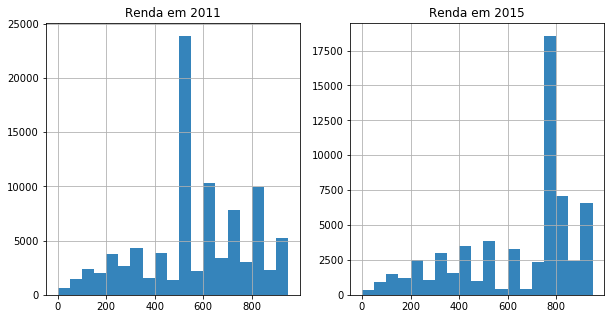

In [103]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo1_renda15, bins=faixa1, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 2:

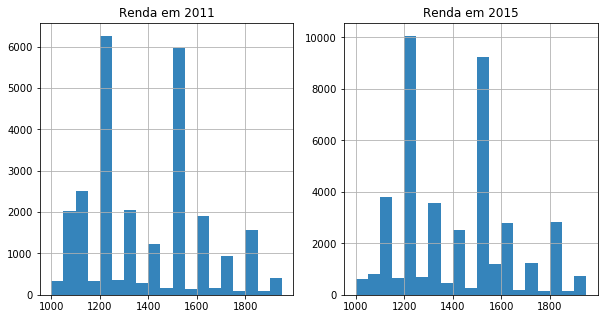

In [104]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo2_renda11, bins=faixa2, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo2_renda15, bins=faixa2, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 3:

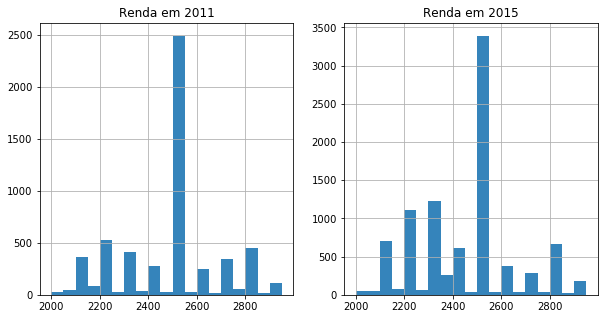

In [105]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo3_renda15, bins=faixa3, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 4:

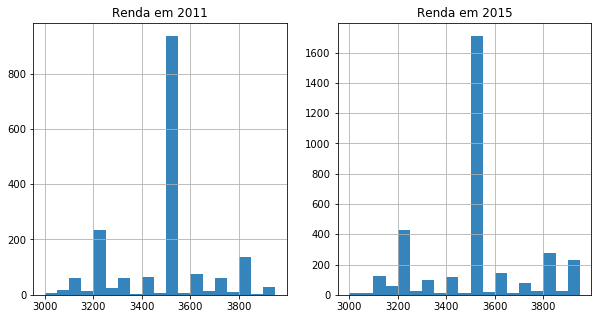

In [106]:
plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.hist(grupo4_renda11, bins=faixa4, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()
plt.subplot(122)

plt.hist(grupo4_renda15, bins=faixa4, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()
plt.show()

Grupo 5:

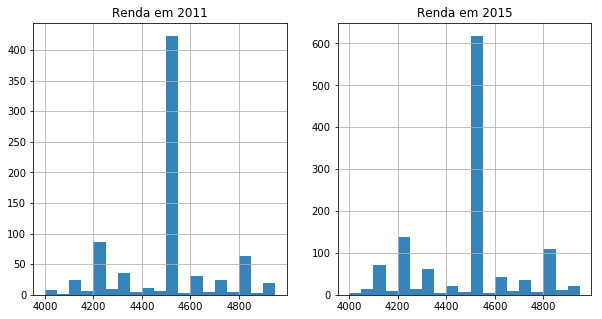

In [107]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo5_renda15, bins=faixa5, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 6:

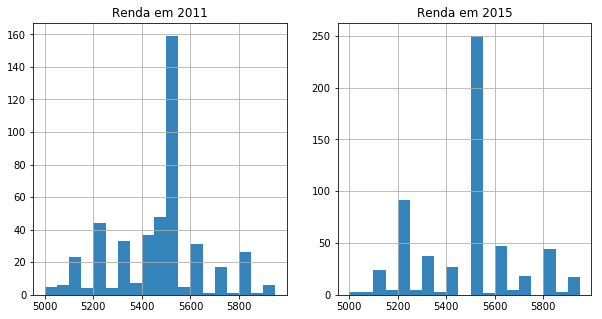

In [108]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo6_renda11, bins=faixa6, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo6_renda15, bins=faixa6, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 7:

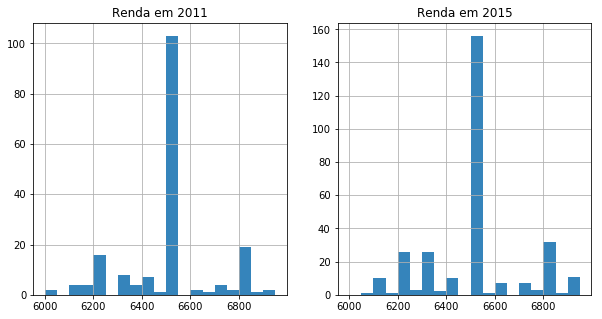

In [109]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo7_renda15, bins=faixa7, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 8:

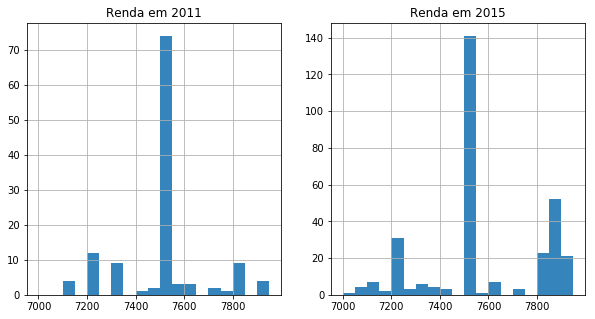

In [110]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo8_renda11, bins=faixa8, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo8_renda15, bins=faixa8, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 9:

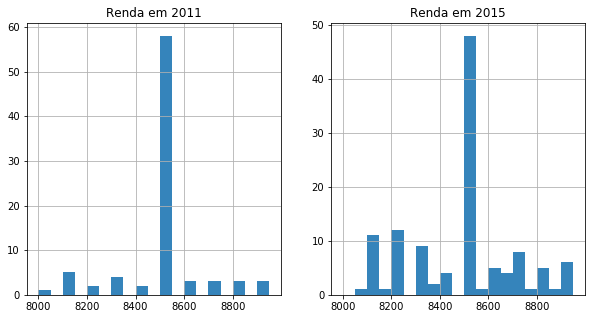

In [111]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo9_renda15, bins=faixa9, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 10:

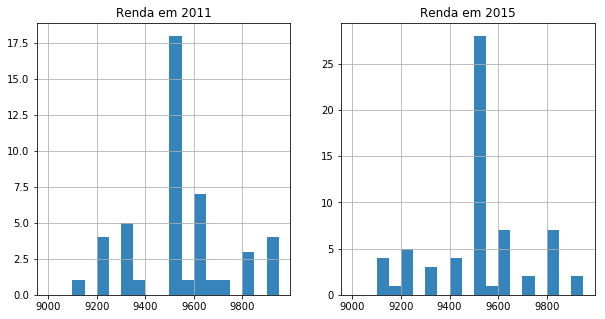

In [112]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo10_renda11, bins=faixa10, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo Large:

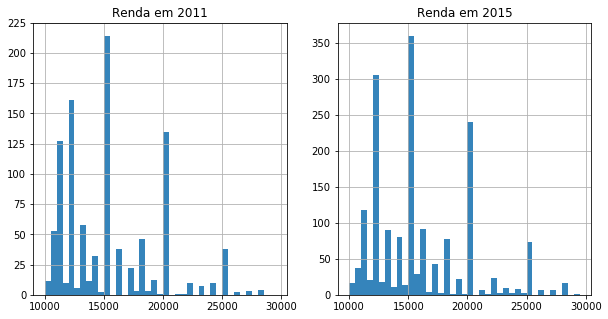

In [113]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupoL_renda11, bins=faixaL, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupoL_renda15, bins=faixaL, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Denota-se que existem muitos outliers que estão atrapalhando

# __ Realizando Crosstabs: __

Escolaridade com Internet:

In [ ]:
escolaridade_internet11 = pd.crosstab(dados.Escolaridade11, dados.Internet11, normalize = True)*100
escolaridade_internet15 = pd.crosstab(dados2.Escolaridade15, dados2.Internet15, normalize = True)*100

Escolaridade com celular:

In [ ]:
escolaridade_celular11 = pd.crosstab(dados.Escolaridade11, dados.Celular11, normalize = True)*100
escolaridade_celular15 = pd.crosstab(dados2.Escolaridade15, dados2.Celular15, normalize = True)*100

Renda com Escolaridade, separando para cada grupo:

In [ ]:
renda1_escolaridade11 = pd.crosstab(um_renda11, dados.Escolaridade11)
renda1_escolaridade15 = pd.crosstab(dados2.Escolaridade15, um_renda15)

In [ ]:
renda2_escolaridade11 = pd.crosstab(dados.Escolaridade11, dois_renda11)
renda2_escolaridade15 = pd.crosstab(dados2.Escolaridade15, dois_renda15)

In [ ]:
renda3_escolaridade11 = pd.crosstab(dados.Escolaridade11, tres_renda11)
renda3_escolaridade15 = pd.crosstab(dados2.Escolaridade15, tres_renda15)

In [ ]:
renda4_escolaridade11 = pd.crosstab(dados.Escolaridade11, quatro_renda11)
renda4_escolaridade15 = pd.crosstab(dados2.Escolaridade15, quatro_renda15)

In [ ]:
renda5_escolaridade11 = pd.crosstab(dados.Escolaridade11, cinco_renda11)
renda5_escolaridade15 = pd.crosstab(dados2.Escolaridade15, cinco_renda15)

In [ ]:
renda6_escolaridade11 = pd.crosstab(dados.Escolaridade11, seis_renda11)
renda6_escolaridade15 = pd.crosstab(dados2.Escolaridade15, seis_renda15)

In [ ]:
renda7_escolaridade11 = pd.crosstab(dados.Escolaridade11, sete_renda11)
renda7_escolaridade15 = pd.crosstab(dados2.Escolaridade15, sete_renda15)

In [ ]:
renda8_escolaridade11 = pd.crosstab(dados.Escolaridade11, oito_renda11)
renda8_escolaridade15 = pd.crosstab(dados2.Escolaridade15, oito_renda15)

In [ ]:
renda9_escolaridade11 = pd.crosstab(dados.Escolaridade11, nove_renda11)
renda9_escolaridade15 = pd.crosstab(dados2.Escolaridade15, nove_renda15)

In [ ]:
renda10_escolaridade11 = pd.crosstab(dados.Escolaridade11, dez_renda11)
renda10_escolaridade15 = pd.crosstab(dados2.Escolaridade15, dez_renda15)

In [ ]:
rendaL_escolaridade11 = pd.crosstab(dados.Escolaridade11, large_renda11)
rendaL_escolaridade15 = pd.crosstab(dados2.Escolaridade15, large_renda15)

In [ ]:
plt.figure(figsize = (20, 15))

plt.subplot(4,3,1)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.title("Grupo 1")
plt.grid()

plt.subplot(4,3,2)
plt.hist(grupo2_renda15, bins=faixa2, alpha=0.9)
plt.title("Grupo 2")
plt.grid()

plt.subplot(4,3,3)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.title("Grupo 3")
plt.grid()

plt.subplot(4,3,4)
plt.hist(grupo4_renda15, bins=faixa4, alpha=0.9)
plt.title("Grupo 4")
plt.grid()

plt.subplot(4,3,5)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.title("Grupo 5")
plt.grid()

plt.subplot(4,3,6)
plt.hist(grupo6_renda15, bins=faixa6, alpha=0.9)
plt.title("Grupo 6")
plt.grid()

plt.subplot(4,3,7)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.title("Grupo 7")
plt.grid()

plt.subplot(4,3,8)
plt.hist(grupo8_renda15, bins=faixa8, alpha=0.9)
plt.title("Grupo 8")
plt.grid()

plt.subplot(4,3,9)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.title("Grupo 9")
plt.grid()

plt.subplot(4,3,10)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.title("Grupo 10")
plt.grid()

plt.subplot(4,3,11)
plt.hist(grupoL_renda15, bins=faixaL, alpha=0.9)
plt.title("Grupo L")
plt.grid()

plt.show()

In [ ]:
#dados2.Renda15.plot.box(by = "dados2.Escolaridade15")

0.0       Axes(0.125,0.125;0.0824468x0.755)
2.0    Axes(0.223936,0.125;0.0824468x0.755)
3.0    Axes(0.322872,0.125;0.0824468x0.755)
4.0    Axes(0.421809,0.125;0.0824468x0.755)
5.0    Axes(0.520745,0.125;0.0824468x0.755)
6.0    Axes(0.619681,0.125;0.0824468x0.755)
7.0    Axes(0.718617,0.125;0.0824468x0.755)
8.0    Axes(0.817553,0.125;0.0824468x0.755)
dtype: object

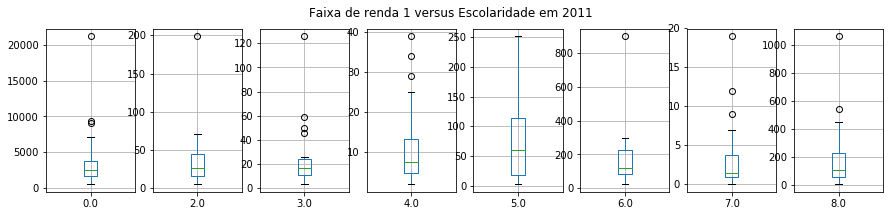

In [141]:
# = dados.Escolaridade11.loc[(dados.Renda11 <= 1000) & (dados.Renda11 > 1)]
renda1_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 1 versus Escolaridade em 2011")
#, autopct="%0.2f",
#grupo1_escolaridade11_renda